In [14]:
from analyzer import get_trainer_log, extract_data, get_model_name
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def plot_data(data, title, x_label, y_label, interval=1):
    x, y = data
    plt.plot(x[::interval], y[::interval])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [16]:
def plot_epoch(
    data, title, x_label, y_label, start_epoch=0, num_epochs=200, fig=None
):
    interval = 4
    x, y = data
    x = np.array([i for i in range(start_epoch, num_epochs + start_epoch)])
    y = y[::interval]
    # assert len(x) >= num_epochs + start_epoch
    y = y[start_epoch : num_epochs + start_epoch]
    if fig is None:
        fig = plt.figure()
        plot = fig.add_subplot(111)
    else:
        plot = fig.get_axes()[0]
    plot.plot(x, y)
    plot.set_title(title)
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    return fig


def plot_one_log(
    log_file,
    rank=0,
    type="acc",
    start_epoch=0,
    num_epochs=200,
    fig=None,
    get_from_cache=False,
    save=True,
):
    data = None
    if get_from_cache:
        if os.path.exists(f"{log_file}_{type}.npy"):
            data = np.load(f"{log_file}_{type}.npy")
        else:
            raise FileNotFoundError(
                f"File {log_file}_{type}.npy not found. Please set get_from_cache to False."
            )
    else:
        model_name = get_model_name(log_file)
        data = extract_data(
            get_trainer_log(log_file),
            rank=rank,
            data_type=type,
        )
    if save:
        np.save(f"{log_file}_{type}.npy", data)
    type_name = "Accuracy" if type == "acc" else "Loss"
    return plot_epoch(
        data,
        f"{model_name} {type_name} vs. Epoch",
        "Epoch",
        type_name,
        start_epoch=start_epoch,
        num_epochs=num_epochs,
        fig=fig,
    )


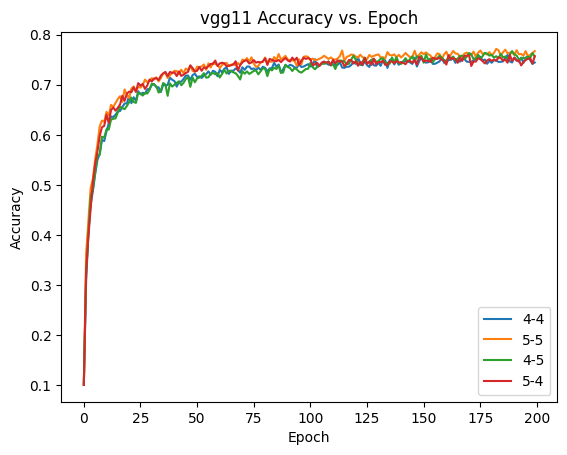

In [17]:
start_epoch = 0
num_epochs = 200-start_epoch

fig = plot_one_log("vgg11-4-4",start_epoch=start_epoch, num_epochs=num_epochs)
plot_one_log("vgg11-5-5", fig=fig, start_epoch=start_epoch, num_epochs=num_epochs)
plot_one_log("vgg11-from4to5", fig=fig, start_epoch=start_epoch, num_epochs=num_epochs)
plot_one_log("vgg11-from5to4", fig=fig, start_epoch=start_epoch, num_epochs=num_epochs)
plt.legend(["4-4", "5-5","4-5","5-4"])
plt.show()

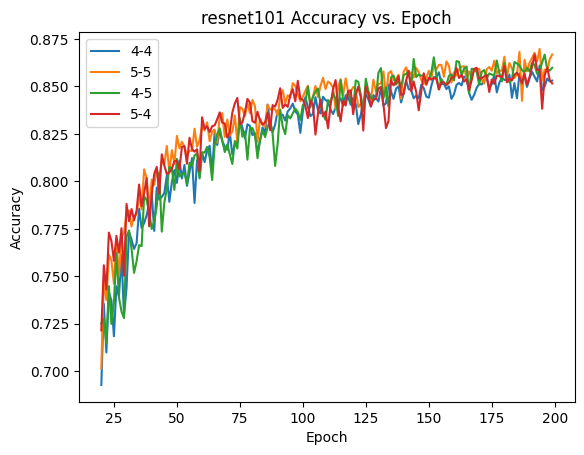

In [18]:
start_epoch = 20
num_epochs = 200-start_epoch

fig = plot_one_log("resnet101-4-4",start_epoch=start_epoch, num_epochs=num_epochs)
plot_one_log("resnet101-5-5", fig=fig, start_epoch=start_epoch, num_epochs=num_epochs)
plot_one_log("resnet101-from4to5", fig=fig, start_epoch=start_epoch, num_epochs=num_epochs)
plot_one_log("resnet101-from5to4", fig=fig, start_epoch=start_epoch, num_epochs=num_epochs)
plt.legend(["4-4", "5-5","4-5","5-4"])
plt.show()

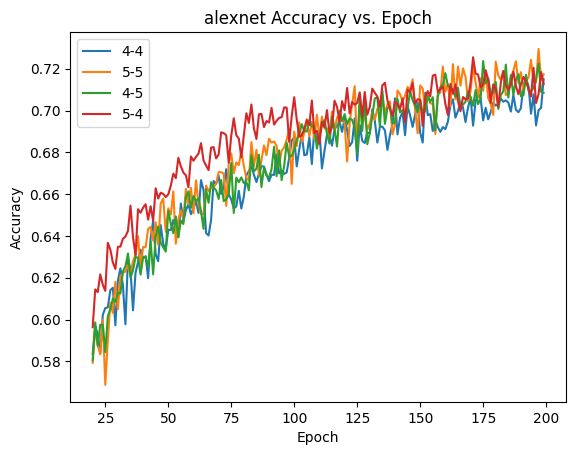

In [19]:
start_epoch = 20
num_epochs = 200-start_epoch

fig = plot_one_log("alexnet-4-4",start_epoch=start_epoch, num_epochs=num_epochs)
plot_one_log("alexnet-5-5", fig=fig, start_epoch=start_epoch, num_epochs=num_epochs)
plot_one_log("alexnet-from4to5", fig=fig, start_epoch=start_epoch, num_epochs=num_epochs)
plot_one_log("alexnet-from5to4", fig=fig, start_epoch=start_epoch, num_epochs=num_epochs)
plt.legend(["4-4", "5-5","4-5","5-4"])
plt.show()